# Dudas relacionadas con el metodo de posicionamiento de sensores

In [7]:
#Cargando librerías 

import importlib
import positioning_sensors as ps
importlib.reload(ps)

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np


plt.style.use("ggplot")

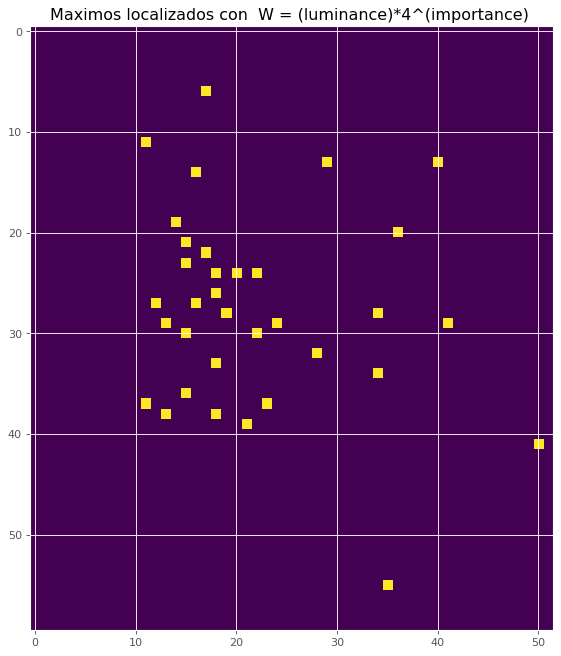

In [8]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

luminance = ps.readIMG(ilumina)
importance = ps.readIMG(niveles,invert=True)

nonsat = ps.desaturate(luminance,th=62)
nonsat = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

W1 = ps.f5(nonsat,importance)
seeds = ps.getMax(W1)

seeds_nonsat = ps.getMax(nonsat)
coords_nonsat = ps.get_coords(seeds_nonsat)

plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds*np.max(W1)/2+W1)
plt.imshow(seeds)
plt.title("Maximos localizados con  W = (luminance)*4^(importance) ")
plt.show()

**Problema 1**

Si queremos posicionar sensores forzozamente por regiones de importancia este método no funciona. Porque no hay garantías de posicionar al menos un sensor en en cada región.

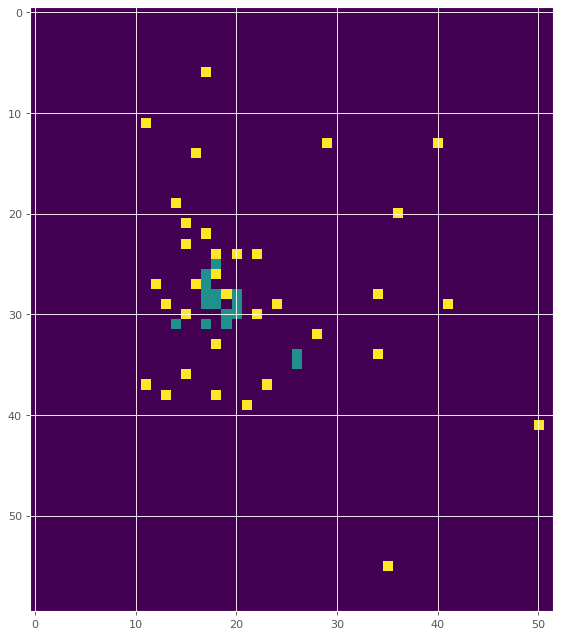

In [3]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(seeds*2+(importance==1)*1)

**Problema 2**  
Si queremos forzar el posicionamiento de al menos de un senso por region de importancia,
tendríamos redundancia de mediciones por la cercanía de estos

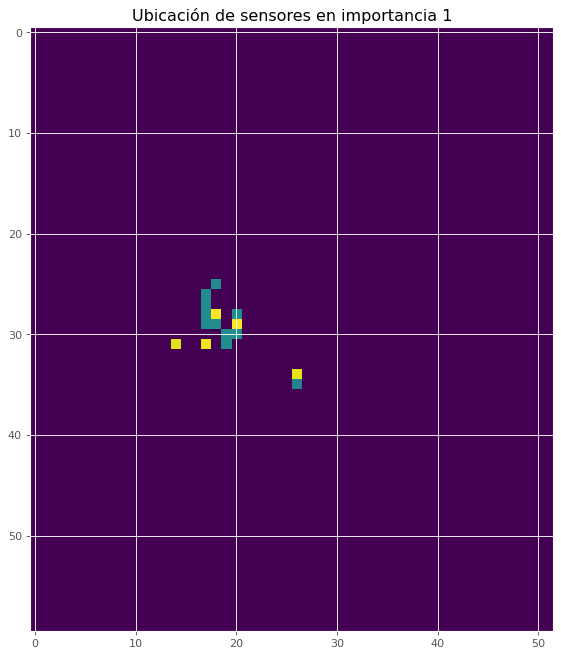

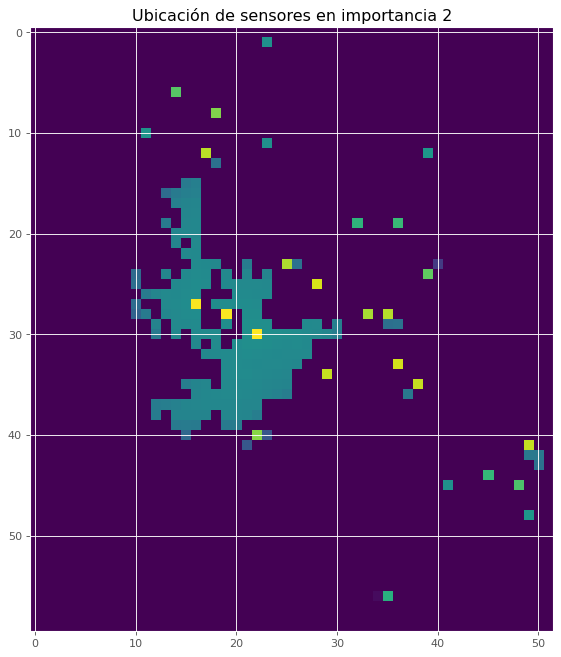

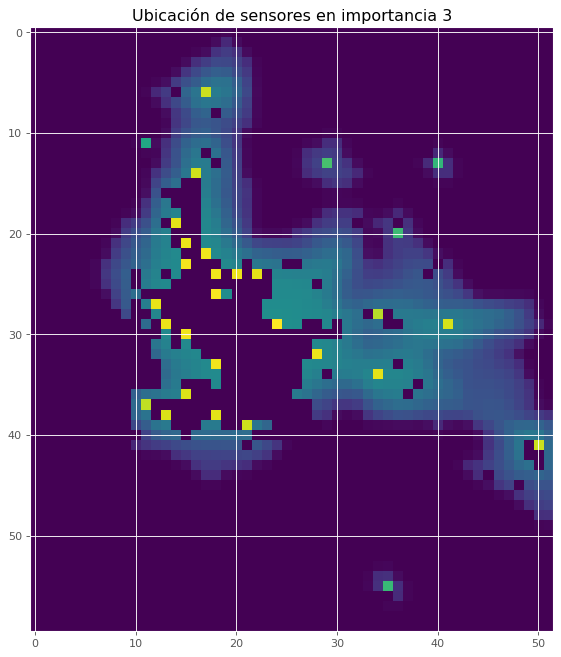

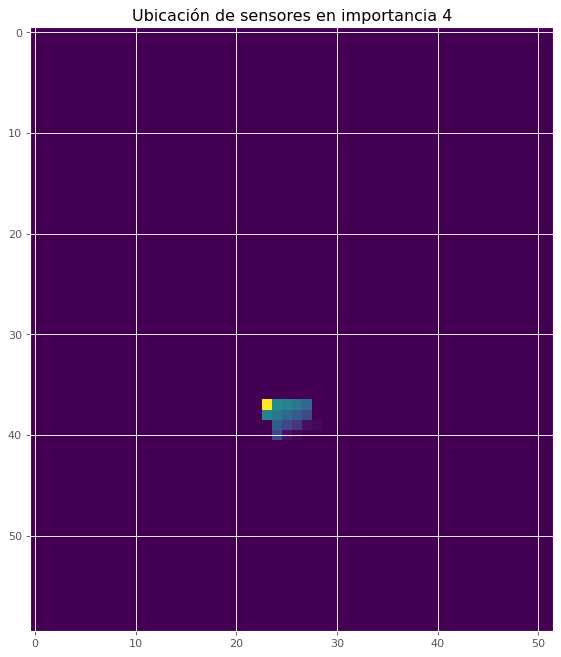

In [4]:

max_each_level = np.zeros(importance.shape)

for l in range(1, int(np.max(importance)+1)):
    plt.figure(figsize=(10, 10), dpi=80)
    level1 = 1*(importance==l)*W1
    locations = ps.getMax(level1)
    max_each_level += locations
    plt.imshow(locations*np.max(level1)+level1)
    plt.title("Ubicación de sensores en importancia "+str(l))
    plt.show()

Al unir todos estos sensores en un mapa tenemos



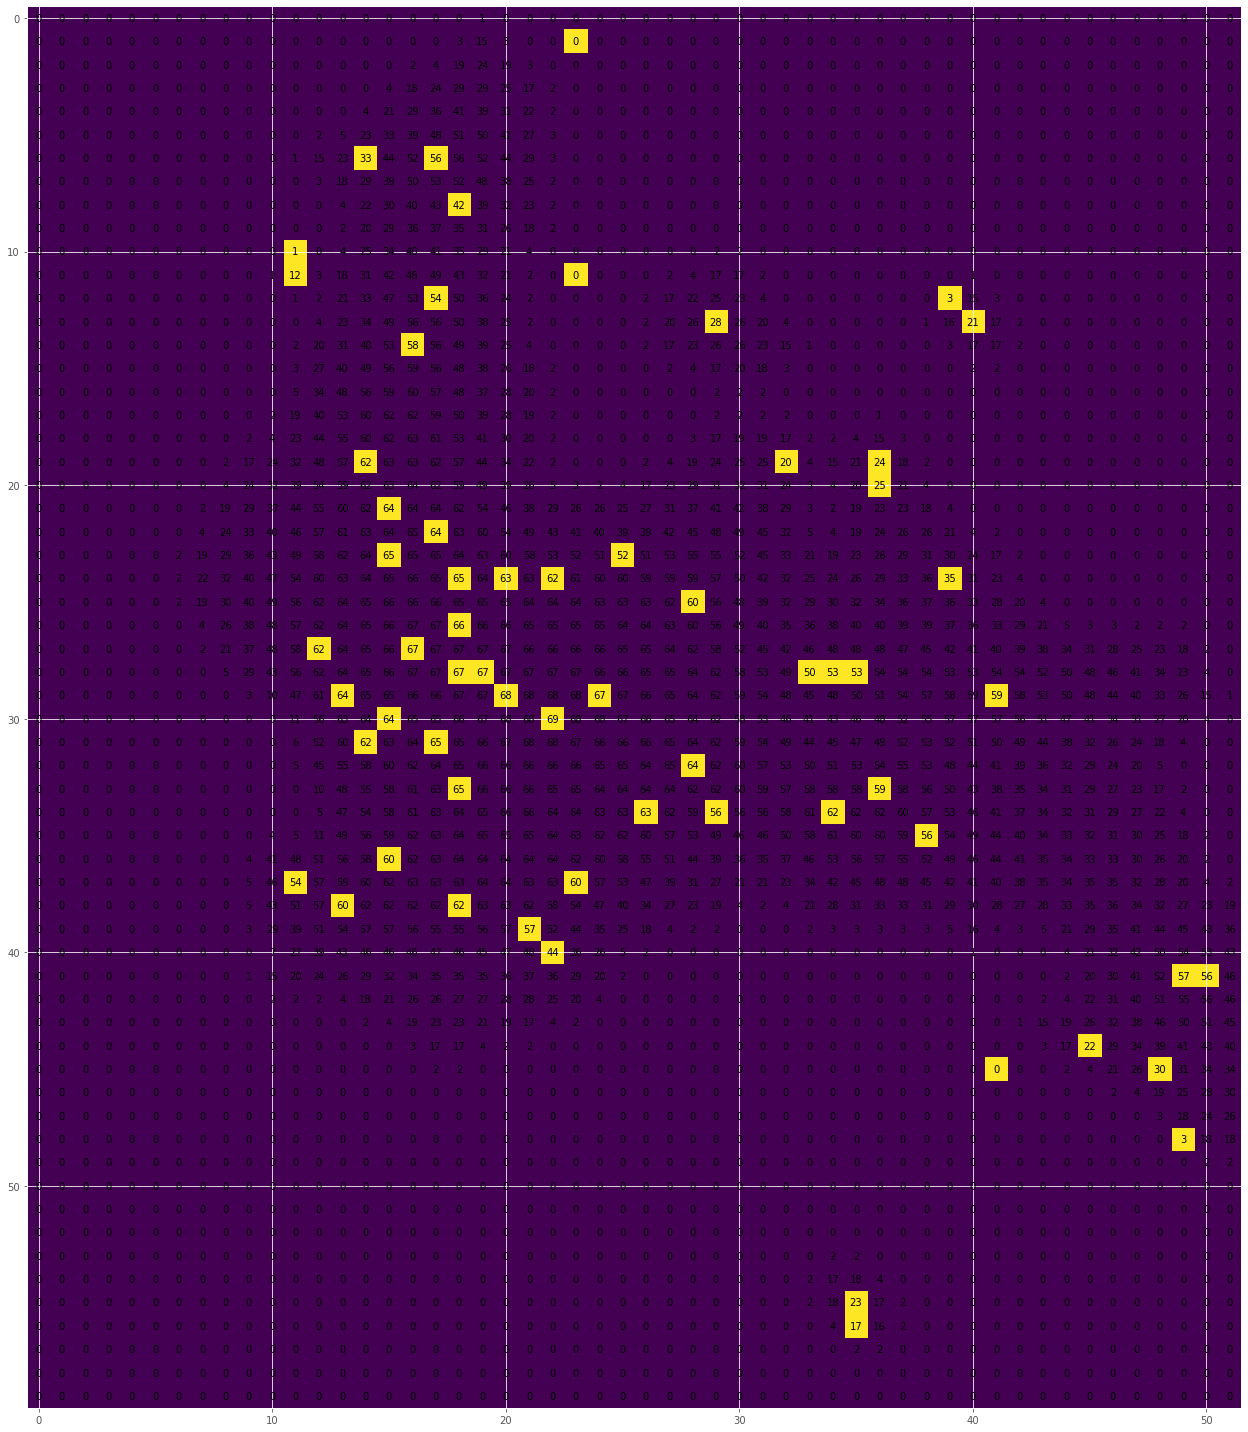

In [5]:
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(max_each_level)
for i in range((max_each_level.shape[0])):
    for j in range(max_each_level.shape[1]):
        text = ax.text(j, i, int(nonsat[i, j]),
                       ha="center", va="center", color="black")

#plt.figure(figsize=(10, 10), dpi=80)
fig.tight_layout()
plt.show()

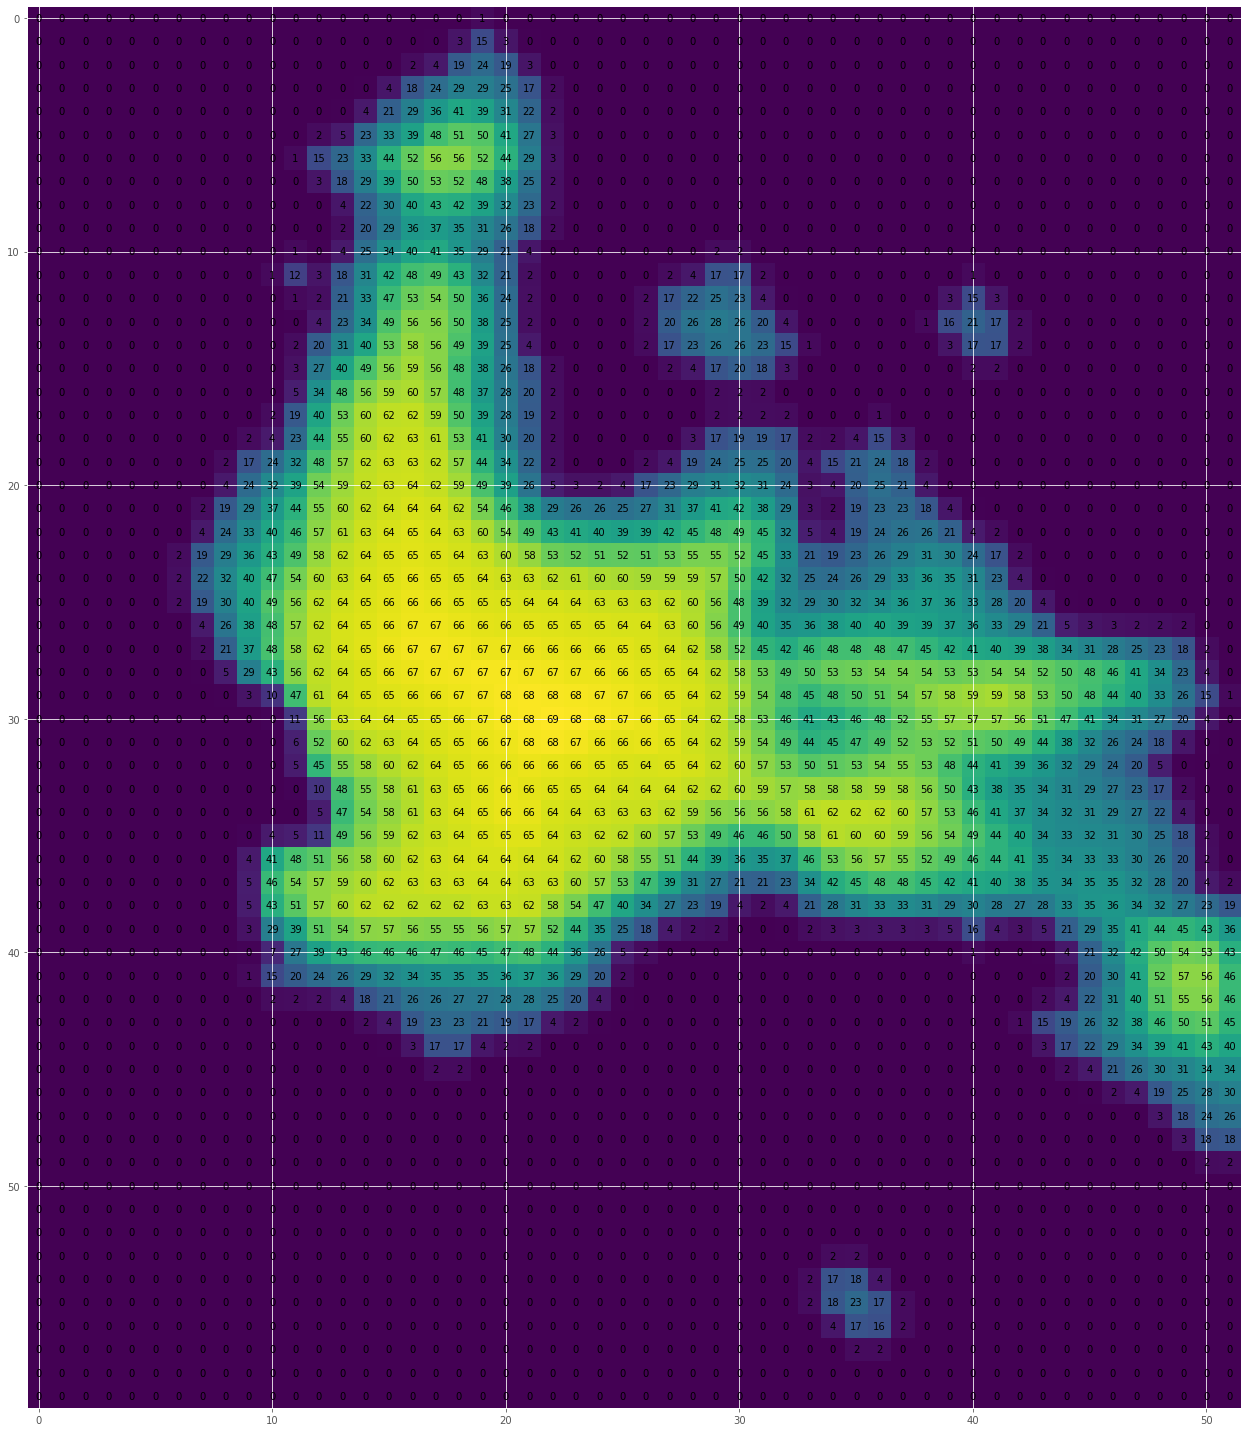

In [6]:
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(nonsat)
for i in range((max_each_level.shape[0])):
    for j in range(max_each_level.shape[1]):
        text = ax.text(j, i, int(nonsat[i, j]),
                       ha="center", va="center", color="black")

#plt.figure(figsize=(10, 10), dpi=80)
fig.tight_layout()
plt.show()

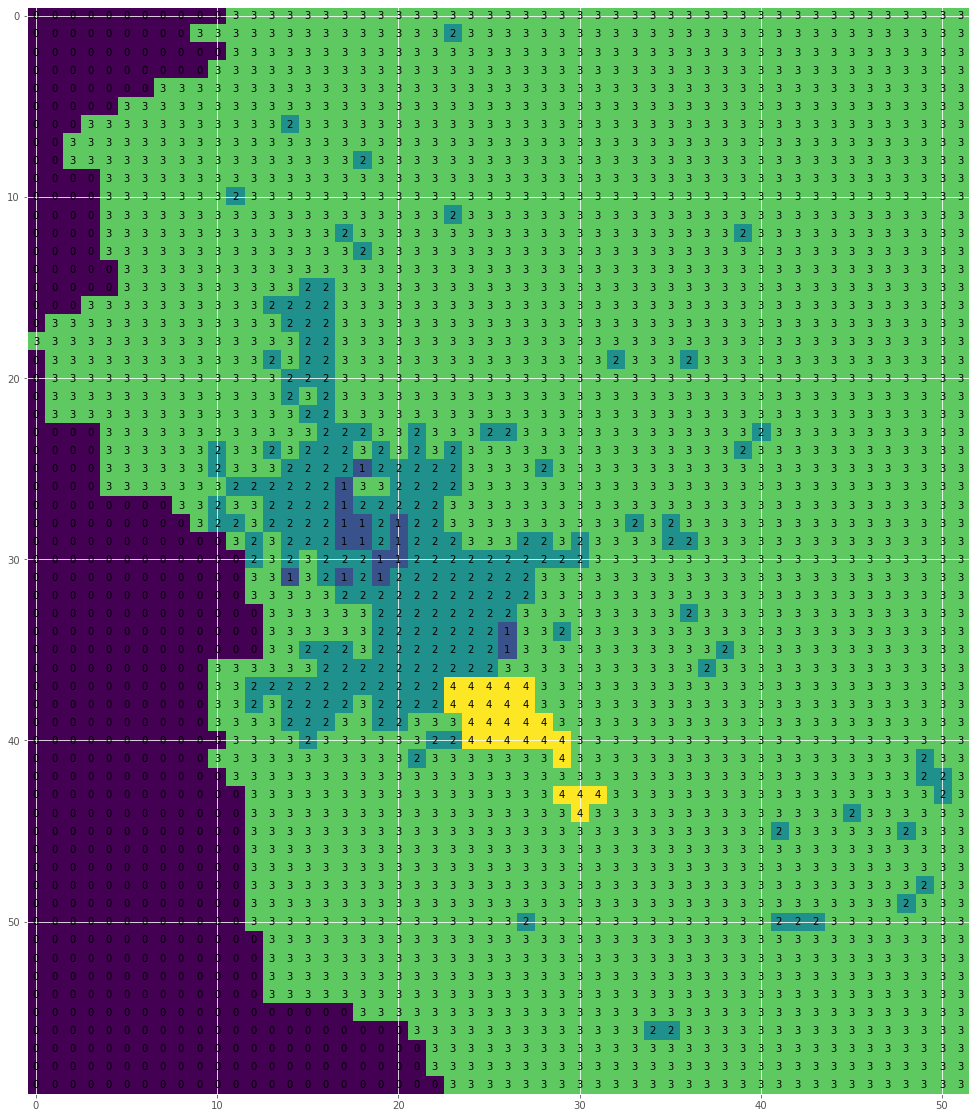

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(importance)
for i in range((max_each_level.shape[0])):
    for j in range(max_each_level.shape[1]):
        text = ax.text(j, i, int(importance[i, j]),
                       ha="center", va="center", color="black")

In [6]:
import numpy as np
np.linalg.norm([-4,5])

6.4031242374328485

$$\underset{ {s_i}_{i=1}^M \in L}{argmin} \sum_{j}^{M}\sum_{i}{W}_{s_j,i} \left( \frac{1}{1+V_{s_j,i}}\right)$$

donde:

$L \in \{1,2,\dots,N\}$
s.t.
$$ | {s_i}_{i=1}^{M}|=M $$